In [42]:
# Import dependencies
import json
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import re

from sqlalchemy import create_engine
import psycopg2

from config import db_password

import time
import datetime as dt

In [2]:
# create a variable to hold the RDS instance address
rds_address = 'marketing-data.c255i23tlogx.us-east-1.rds.amazonaws.com'

# make a connection string for the engine to connect to the database
# "postgresql://[user]:[password]@[location]:[port]/[database]"
db_string = f"postgresql://postgres:{db_password}@{rds_address}:5432/postgres"
    
# Create the database engine
engine = create_engine(db_string)

In [21]:
# Test the connection by import data in Postgres table into a Panda DataFrame
# Connect to PostgreSQL server
dbConnection = engine.connect()

# Read data from PostgreSQL database table and load into a DataFrame instance
marketing_df = pd.read_sql("select * from \"marketing_data\"", dbConnection)

# Print the DataFrame
marketing_df

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,...,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,response,complain,country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,2014-06-16,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,2014-06-15,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,2014-05-13,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,2014-05-11,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,2014-04-08,0,6,...,2,7,1,0,0,0,0,1,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,"$66,476.00",0,1,2013-03-07,99,372,...,11,4,0,0,0,0,0,0,0,US
2236,5263,1977,2n Cycle,Married,"$31,056.00",1,0,2013-01-22,99,5,...,3,8,0,0,0,0,0,0,0,SP
2237,22,1976,Graduation,Divorced,"$46,310.00",1,0,2012-12-03,99,185,...,5,8,0,0,0,0,0,0,0,SP
2238,528,1978,Graduation,Married,"$65,819.00",0,0,2012-11-29,99,267,...,10,3,0,0,0,0,0,0,0,IND


In [4]:
# Check for duplicates
marketing_df.duplicated().sum()

0

In [5]:
# Check for null values
marketing_df.isnull().sum()

id                      0
year_birth              0
education               0
marital_status          0
income                 24
kidhome                 0
teenhome                0
dt_customer             0
recency                 0
mntwines                0
mntfruits               0
mntmeatproducts         0
mntfishproducts         0
mntsweetproducts        0
mntgoldprods            0
numdealspurchases       0
numwebpurchases         0
numcatalogpurchases     0
numstorepurchases       0
numwebvisitsmonth       0
acceptedcmp3            0
acceptedcmp4            0
acceptedcmp5            0
acceptedcmp1            0
acceptedcmp2            0
response                0
complain                0
country                 0
dtype: int64

In [11]:
# Retrieve the rows with null 'income'
marketing_df.loc[marketing_df['income'].isnull()==True]

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,...,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,response,complain,country
134,8996,1957,PhD,Married,None,2,1,2012-11-19,4,230,...,8,9,0,0,0,0,0,0,0,GER
262,1994,1983,Graduation,Married,None,1,0,2013-11-15,11,5,...,2,7,0,0,0,0,0,0,0,US
394,3769,1972,PhD,Together,None,1,0,2014-03-02,17,25,...,3,7,0,0,0,0,0,0,0,AUS
449,5255,1986,Graduation,Single,None,1,0,2013-02-20,19,5,...,0,1,0,0,0,0,0,0,0,AUS
525,8268,1961,PhD,Married,None,0,1,2013-07-11,23,352,...,7,6,0,0,0,0,0,0,0,CA
590,10629,1973,2n Cycle,Married,None,1,0,2012-09-14,25,25,...,3,8,0,0,0,0,0,0,0,GER
899,10475,1970,Master,Together,None,0,1,2013-04-01,39,187,...,6,5,0,0,0,0,0,0,0,US
997,9235,1957,Graduation,Single,None,1,1,2014-05-27,45,7,...,2,7,0,0,0,0,0,0,0,GER
1096,4345,1964,2n Cycle,Single,None,1,1,2014-01-12,49,5,...,2,7,0,0,0,0,0,0,0,AUS
1185,7187,1969,Master,Together,None,1,1,2013-05-18,52,375,...,4,3,0,0,0,0,0,0,0,AUS


In [12]:
# Inspect the columns' datatypes
marketing_df.dtypes

id                      int64
year_birth              int64
education              object
marital_status         object
income                 object
kidhome                 int64
teenhome                int64
dt_customer            object
recency                 int64
mntwines                int64
mntfruits               int64
mntmeatproducts         int64
mntfishproducts         int64
mntsweetproducts        int64
mntgoldprods            int64
numdealspurchases       int64
numwebpurchases         int64
numcatalogpurchases     int64
numstorepurchases       int64
numwebvisitsmonth       int64
acceptedcmp3            int64
acceptedcmp4            int64
acceptedcmp5            int64
acceptedcmp1            int64
acceptedcmp2            int64
response                int64
complain                int64
country                object
dtype: object

In [22]:
# Remove the $ signs from 'income' column values
# Convert 'income' column into float datatype
marketing_df['income'] = marketing_df['income'].replace('[\$,]', '', regex=True).astype(float)

# Check the columns' datatypes after converting
marketing_df.income.dtype

dtype('float64')

In [24]:
# Convert 'dt_customer' to datetime datatype
marketing_df["dt_customer"] = pd.to_datetime(marketing_df["dt_customer"])

# Check the columns' datatypes after converting
marketing_df.dt_customer

0      2014-06-16
1      2014-06-15
2      2014-05-13
3      2014-05-11
4      2014-04-08
          ...    
2235   2013-03-07
2236   2013-01-22
2237   2012-12-03
2238   2012-11-29
2239   2012-09-01
Name: dt_customer, Length: 2240, dtype: datetime64[ns]

In [27]:
# Retrieve value counts for 'marital_status' column
marketing_df.marital_status.value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: marital_status, dtype: int64

In [36]:
# Drop the rows where 'marital_status' is 'Absurd' or 'YOLO'
marketing_df = marketing_df.loc[(marketing_df["marital_status"] != 'Absurd') & (marketing_df["marital_status"] != 'YOLO')]

# Change 'ALone' to 'Single'
marketing_df['marital_status'].replace("Alone","Single", inplace=True)

# Retrieve value counts for 'marital_status' column
marketing_df.marital_status.value_counts()

Married     864
Together    580
Single      483
Divorced    232
Widow        77
Name: marital_status, dtype: int64

In [37]:
# Retrieve value counts for 'country' column
marketing_df.country.value_counts()

SP     1095
SA      337
CA      266
AUS     159
IND     147
GER     120
US      109
ME        3
Name: country, dtype: int64

In [40]:
# Add "total_amnt" column whose values are the total amounts spent on all products in the last 2 years
total_spent = marketing_df["mntwines"] + marketing_df["mntfruits"] +  marketing_df["mntmeatproducts"]+ marketing_df["mntfishproducts"]+ marketing_df["mntsweetproducts"]+ marketing_df["mntgoldprods"]
marketing_df["total_amnt"] = total_spent
marketing_df.head()

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,...,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,response,complain,country,total_amnt
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,1,0,0,0,0,0,1,0,SP,1190
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,5,0,0,0,0,1,1,0,CA,577
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,2,0,0,0,0,0,0,0,US,251
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,7,0,0,0,0,0,0,0,AUS,11
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,7,1,0,0,0,0,1,0,SP,91


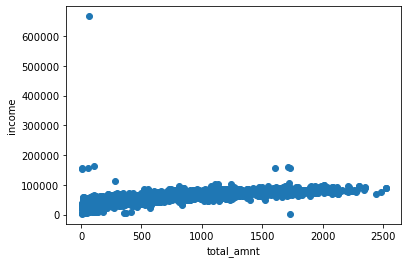

In [43]:
# Create a scatter plot with 'total_amnt' as the x_axis and 'income' as the y_axis
plt.scatter(marketing_df.total_amnt, marketing_df.income)
plt.xlabel('total_amnt')
plt.ylabel('income')
plt.show()

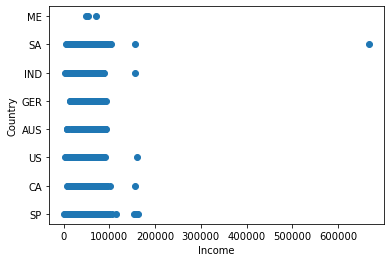

In [45]:
# Create a scatter plot with 'income' as the x_axis and 'country' as the y_axis
plt.scatter(marketing_df.income, marketing_df.country)
plt.xlabel('Income')
plt.ylabel('Country')
plt.show()

<AxesSubplot:>

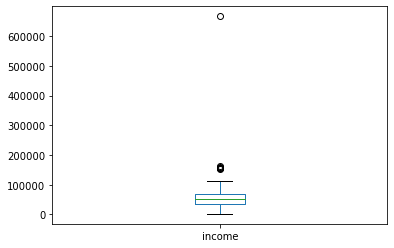

In [46]:
# Create a box & whisker plot for 'income'
marketing_df['income'].plot(kind='box')

In [49]:
# Retrieve the rows of potential outliers
marketing_df.loc[marketing_df['income'] > 120000]

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,...,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,response,complain,country,total_amnt
325,4931,1977,Graduation,Together,157146.0,0,0,2013-04-29,13,1,...,1,0,0,0,0,0,0,0,SA,1730
497,1501,1982,PhD,Married,160803.0,0,0,2012-08-04,21,55,...,0,0,0,0,0,0,0,0,US,1717
527,9432,1977,Graduation,Together,666666.0,1,0,2013-06-02,23,9,...,6,0,0,0,0,0,0,0,SA,62
731,1503,1976,PhD,Together,162397.0,1,1,2013-06-03,31,85,...,1,0,0,0,0,0,0,0,SP,107
853,5336,1971,Master,Together,157733.0,1,0,2013-06-04,37,39,...,1,0,0,0,0,0,0,0,SP,59
1826,5555,1975,Graduation,Divorced,153924.0,0,0,2014-02-07,81,1,...,0,0,0,0,0,0,0,0,SP,6
1925,11181,1949,PhD,Married,156924.0,0,0,2013-08-29,85,2,...,0,0,0,0,0,0,0,0,CA,8
2204,8475,1973,PhD,Married,157243.0,0,1,2014-03-01,98,20,...,0,0,0,0,0,0,0,0,IND,1608


In [61]:
# Which marketing campaign is most successful?
campaign_df = pd.DataFrame(np.array([[1,marketing_df['acceptedcmp1'].sum()], [2,marketing_df['acceptedcmp2'].sum()], [3,marketing_df['acceptedcmp3'].sum()], [4,marketing_df['acceptedcmp4'].sum()], [5,marketing_df['acceptedcmp5'].sum()]]), 
                           columns = ['Campaign', 'Number of Customers'])
campaign_df.sort_values(by=['Number of Customers'], ascending=False)

,Campaign,Number of Customers
3,4,167
2,3,163
4,5,162
0,1,143
1,2,30
